# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [2]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

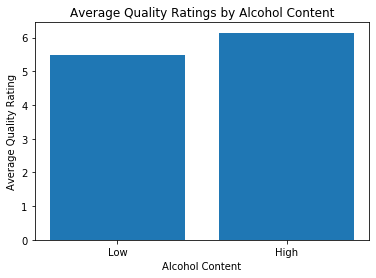

In [3]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [8]:
# Use query to select each group and get its mean quality
median_residual_sugar = df['residual_sugar'].median()
low_sugar = df.query('residual_sugar < {}'.format(median_residual_sugar))
high_sugar = df.query('residual_sugar >= {}'.format( median_residual_sugar))

low_sugar_mean_quality = low_sugar['quality'].mean()
high_sugar_mean_quality = high_sugar['quality'].mean()

Text(0, 0.5, 'Quality')

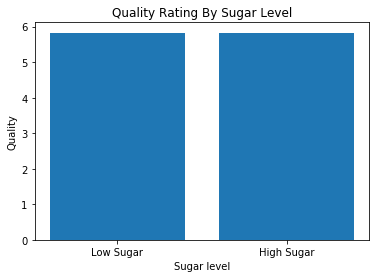

In [14]:
# Create a bar chart with proper labels
x_axis = [1,2]
quality = [low_sugar_mean_quality, high_sugar_mean_quality]
labels = ['Low Sugar','High Sugar']
plt.bar(x_axis,quality,tick_label=labels)
plt.title('Quality Rating By Sugar Level')
plt.xlabel('Sugar level')
plt.ylabel('Quality')



### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [18]:
# Use groupby to get the mean quality for each acidity level
new_df = df.groupby('acidity_levels').mean().quality
new_df

acidity_levels
high               5.783343
low                5.859593
medium             5.850832
moderately_high    5.784540
Name: quality, dtype: float64

Text(0, 0.5, 'Quality')

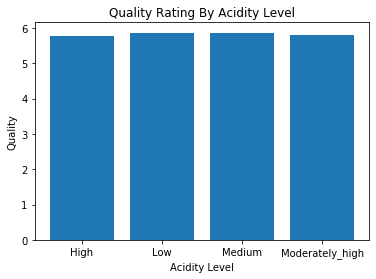

In [21]:
# Create a bar chart with proper labels
x_axis = [1,2,3,4]
quality = [5.783343,5.859593,5.850832,5.784540]
labels = ['High','Low','Medium','Moderately_high']
plt.bar(x_axis,quality,tick_label=labels)
plt.title('Quality Rating By Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Quality')


### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

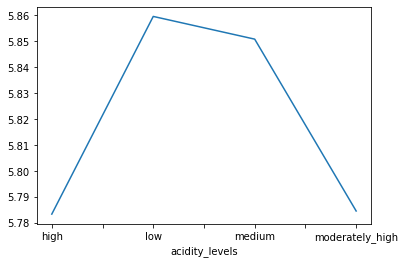

In [22]:
new_df.plot.line()

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?

#### From the line plot the difference in the quality rating for each of the acidity levels is clearer
#### Wine with low acidity level has a higher quality rating